# PRIDITING RESIDENTIAL HOUSE PRICES USING MACHINE LEARNING

in this project, I am going to build a machine learning model that predicts the prices of homes across Ames, Iowa.

### 1. Problem Definition

How well can we predict the sales value of a home given different explanatory variables about each home.

### 1. Data

The data was downlaoded from Kaggle https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data
    

       It contains a combination of the Training datasets and the Test datasets.

### 3. Evaluation

Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)

It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

### 4. Features

Data fields

Here's a brief version of what you'll find in the data description file.

    SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
    MSSubClass: The building class
    MSZoning: The general zoning classification
    LotFrontage: Linear feet of street connected to property
    LotArea: Lot size in square feet
    Street: Type of road access
    Alley: Type of alley access
    LotShape: General shape of property
    LandContour: Flatness of the property
    Utilities: Type of utilities available
    LotConfig: Lot configuration
    LandSlope: Slope of property
    Neighborhood: Physical locations within Ames city limits
    Condition1: Proximity to main road or railroad
    Condition2: Proximity to main road or railroad (if a second is present)
    BldgType: Type of dwelling
    HouseStyle: Style of dwelling
    OverallQual: Overall material and finish quality
    OverallCond: Overall condition rating
    YearBuilt: Original construction date
    YearRemodAdd: Remodel date
    RoofStyle: Type of roof
    RoofMatl: Roof material
    Exterior1st: Exterior covering on house
    Exterior2nd: Exterior covering on house (if more than one material)
    MasVnrType: Masonry veneer type
    MasVnrArea: Masonry veneer area in square feet
    ExterQual: Exterior material quality
    ExterCond: Present condition of the material on the exterior
    Foundation: Type of foundation
    BsmtQual: Height of the basement
    BsmtCond: General condition of the basement
    BsmtExposure: Walkout or garden level basement walls
    BsmtFinType1: Quality of basement finished area
    BsmtFinSF1: Type 1 finished square feet
    BsmtFinType2: Quality of second finished area (if present)
    BsmtFinSF2: Type 2 finished square feet
    BsmtUnfSF: Unfinished square feet of basement area
    TotalBsmtSF: Total square feet of basement area
    Heating: Type of heating
    HeatingQC: Heating quality and condition
    CentralAir: Central air conditioning
    Electrical: Electrical system
    1stFlrSF: First Floor square feet
    2ndFlrSF: Second floor square feet
    LowQualFinSF: Low quality finished square feet (all floors)
    GrLivArea: Above grade (ground) living area square feet
    BsmtFullBath: Basement full bathrooms
    BsmtHalfBath: Basement half bathrooms
    FullBath: Full bathrooms above grade
    HalfBath: Half baths above grade
    Bedroom: Number of bedrooms above basement level
    Kitchen: Number of kitchens
    KitchenQual: Kitchen quality
    TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
    Functional: Home functionality rating
    Fireplaces: Number of fireplaces
    FireplaceQu: Fireplace quality
    GarageType: Garage location
    GarageYrBlt: Year garage was built
    GarageFinish: Interior finish of the garage
    GarageCars: Size of garage in car capacity
    GarageArea: Size of garage in square feet
    GarageQual: Garage quality
    GarageCond: Garage condition
    PavedDrive: Paved driveway
    WoodDeckSF: Wood deck area in square feet
    OpenPorchSF: Open porch area in square feet
    EnclosedPorch: Enclosed porch area in square feet
    3SsnPorch: Three season porch area in square feet
    ScreenPorch: Screen porch area in square feet
    PoolArea: Pool area in square feet
    PoolQC: Pool quality
    Fence: Fence quality
    MiscFeature: Miscellaneous feature not covered in other categories
    MiscVal: $Value of miscellaneous feature
    MoSold: Month Sold
    YrSold: Year Sold
    SaleType: Type of sale
    SaleCondition: Condition of sale


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv("house-prices-advanced-regression-techniques - Copy/train.csv")
test = pd.read_csv("house-prices-advanced-regression-techniques - Copy/test.csv")

In [3]:
house_df = pd.concat([train,test],axis=0)

In [4]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [5]:
house_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


In [6]:
#Select variables that have a high correlation with the target variable
house_df.corr().SalePrice

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

In [7]:
house_corr = house_df[["OverallQual","TotalBsmtSF","1stFlrSF","GrLivArea","GarageCars","GarageArea","SalePrice"]]

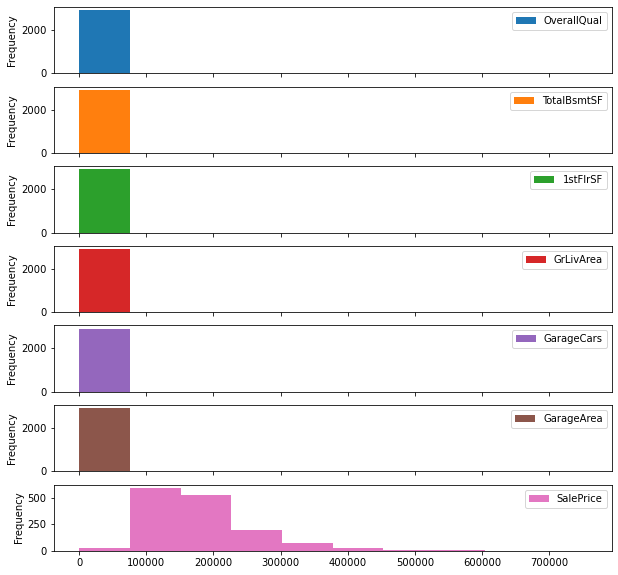

In [8]:
house_corr.plot.hist(subplots=True,figsize=(10,10));

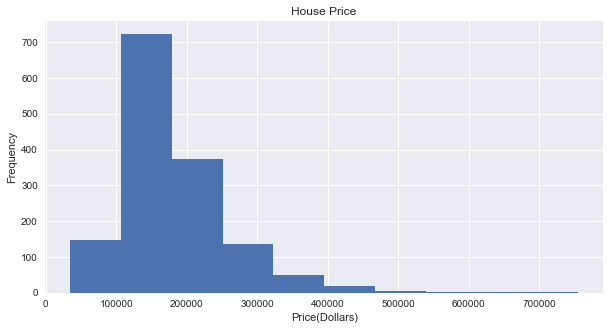

In [9]:
plt.style.use("seaborn")
fig,ax = plt.subplots(figsize=(10,5))
ax.hist(house_df["SalePrice"])
ax.set(title="House Price",
       xlabel="Price(Dollars)",
       ylabel="Frequency");

In [10]:
#Convert object coloumns to Categories
for label,content in house_df.items():
    if pd.api.types.is_string_dtype(content):
        house_df[label]= content.astype("category").cat.as_ordered()

In [11]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             2919 non-null   int64   
 1   MSSubClass     2919 non-null   int64   
 2   MSZoning       2915 non-null   category
 3   LotFrontage    2433 non-null   float64 
 4   LotArea        2919 non-null   int64   
 5   Street         2919 non-null   category
 6   Alley          198 non-null    category
 7   LotShape       2919 non-null   category
 8   LandContour    2919 non-null   category
 9   Utilities      2917 non-null   category
 10  LotConfig      2919 non-null   category
 11  LandSlope      2919 non-null   category
 12  Neighborhood   2919 non-null   category
 13  Condition1     2919 non-null   category
 14  Condition2     2919 non-null   category
 15  BldgType       2919 non-null   category
 16  HouseStyle     2919 non-null   category
 17  OverallQual    2919 non-null   in

### FILL IN THE MISSING VALUES

 Let's start with the numeric values first.

In [12]:
# Drop columns with too much null values
house_df = house_df.drop(["PoolQC","Fence","MiscFeature","Alley"],axis=1)

In [13]:
# Fill the missing values in the numeric coloumns  
for label,content in house_df.items():
    if pd.api.types.is_numeric_dtype(content):
        if content.isnull().sum():
            house_df[label]= content.fillna(content.median())

Let's fill the missing values in our categorical variables

In [14]:
for label,content in house_df.items():
    if not pd.api.types.is_numeric_dtype(content):
        if content.isnull().sum():
            house_df[label] = pd.Categorical(content).codes+1       

In [15]:
house_df = pd.get_dummies(house_df,drop_first=True)

In [16]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 161 entries, Id to SaleCondition_Partial
dtypes: float64(12), int64(26), int8(19), uint8(104)
memory usage: 1.2 MB


In [17]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error,accuracy_score

In [18]:
X,y = house_df.drop("SalePrice",axis=1), house_df["SalePrice"]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5)

In [19]:
model = RandomForestRegressor(n_jobs=-1,
                             random_state=42)

model.fit(X_train,y_train);


In [20]:
model.score(X_test,y_test)

0.8044223745652694

In [21]:
y_preds = model.predict(X_test)

In [22]:
y_preds

array([163000.  ,  87038.43, 163000.  , ..., 163000.  , 120406.  ,
       163000.  ])

In [23]:
np.sqrt(mean_squared_error(y_preds,y_test))

24643.193403083296

In [24]:
len(y_preds[:-1])

1459

In [25]:
df_preds = pd.DataFrame()
df_preds["Id"] = test["Id"]
df_preds["SalePrice"] = y_preds[:-1]
df_preds.columns

Index(['Id', 'SalePrice'], dtype='object')

In [27]:
df_preds

,Id,SalePrice
0,1461,163000.00
1,1462,87038.43
2,1463,163000.00
3,1464,163049.00
4,1465,163000.00
...,...,...
1454,2915,163720.00
1455,2916,163250.00
1456,2917,262073.91
1457,2918,163000.00


In [26]:
df_preds.to_csv("House_price_predictions.csv",index=False)